In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2

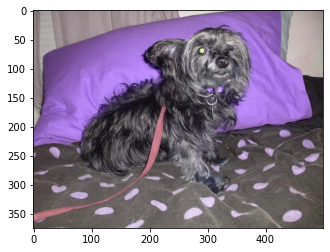

In [5]:
Datadir = "PetImages"
Categories = ["Dog", "Cat"]

for category in Categories:
    path = os.path.join(Datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [6]:
print(img_array)

[[[126 115 117]
  [126 115 117]
  [130 117 119]
  ...
  [142 132 132]
  [141 131 131]
  [141 131 131]]

 [[127 116 118]
  [126 115 117]
  [130 117 119]
  ...
  [144 134 134]
  [143 133 133]
  [143 133 133]]

 [[128 117 119]
  [127 116 118]
  [131 118 120]
  ...
  [146 136 136]
  [145 135 135]
  [145 135 135]]

 ...

 [[ 84  80  75]
  [ 79  75  70]
  [ 78  74  69]
  ...
  [ 85  82  74]
  [ 81  78  70]
  [ 78  75  67]]

 [[ 83  79  74]
  [ 77  73  68]
  [ 74  70  65]
  ...
  [ 77  74  66]
  [ 78  75  67]
  [ 79  76  68]]

 [[ 79  75  70]
  [ 76  72  67]
  [ 75  71  66]
  ...
  [ 80  77  69]
  [ 78  75  67]
  [ 76  73  65]]]


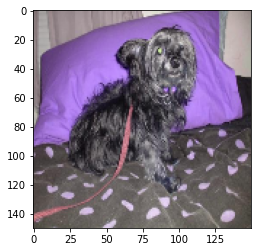

In [7]:
size = 150
new_array = cv2.resize(img_array, (size,size))
plt.imshow(new_array)
plt.show()

In [8]:
training_data = []

def create_training_data():
    for category in Categories:
        path = os.path.join(Datadir, category)
        class_num = Categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (size,size))
                training_data.append([new_array, class_num])
            except:
                pass
create_training_data()

In [9]:
print(len(training_data))

24946


In [10]:
import random
random.shuffle(training_data)

In [11]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
1
1
0
0
1
1
1


In [12]:
X = []
y = []

In [13]:
for features, labels in training_data:
    X.append(features)
    y.append(labels)
    
X = np.array(X).reshape(-1, size, size, 1)
y = np.array(y)

In [14]:
import pickle 

pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [15]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [16]:
X[1]

array([[[199],
        [199],
        [199],
        ...,
        [ 93],
        [111],
        [123]],

       [[118],
        [135],
        [148],
        ...,
        [ 70],
        [ 67],
        [ 76]],

       [[ 97],
        [ 93],
        [103],
        ...,
        [116],
        [ 47],
        [ 50]],

       ...,

       [[ 33],
        [ 25],
        [ 26],
        ...,
        [ 96],
        [ 96],
        [ 96]],

       [[124],
        [124],
        [124],
        ...,
        [130],
        [123],
        [115]],

       [[ 99],
        [ 90],
        [ 82],
        ...,
        [185],
        [190],
        [184]]], dtype=uint8)

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

X = pickle.load(open("X.pickle","rb")) 
y = pickle.load(open("y.pickle","rb")) 

In [18]:
X = X/250
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

model.fit(X,y, batch_size=32, epochs=1, validation_split=0.7)

702/702 [==============================] - ETA: 0s - loss: 0.7240 - accuracy: 0.5014

ValueError: Data cardinality is ambiguous:
  x sizes: 52387
  y sizes: 2495
Make sure all arrays contain the same number of samples.